## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd
from __future__ import print_function, division

import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as pyplot

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

import math

# seed the random number generator so we all get the same results
# numpy.random.seed(17)

# some nice colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

%matplotlib inline

In [3]:
df = pd.read_csv('human_body_temperature.csv')

In [4]:
# understand the sample size, variable names, some example values
df.tail(n=5)

,temperature,gender,heart_rate
125,96.3,M,70.0
126,97.7,M,77.0
127,98.2,F,73.0
128,97.9,M,72.0
129,98.7,F,59.0


# Is the distribution of body temperatures normal?
Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

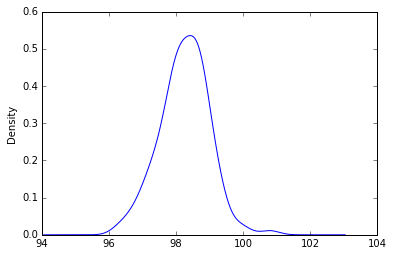

In [6]:
#some early visualisation of the data before drilling into the calcs
df.temperature.plot(kind="kde");

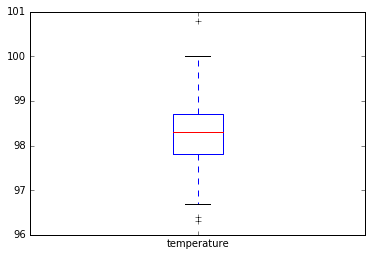

In [7]:
df.temperature.plot(kind="box");

In [8]:
# derive some base stats to be used later
n = n = len(df.temperature) 
temp_mean = np.mean(df.temperature)
temp_var = np.var(df.temperature)
temp_sd = np.std(df.temperature)
temp_se = temp_sd / np.sqrt(n) 
print (n,temp_mean,temp_var,temp_sd,temp_se)

130 98.24923076923078 0.5334224852071 0.7303577789050377 0.0640566146952


In [9]:
# assumed true pupulation mean is 98.6
temp_mean_a = 98.6

In [10]:
# assume significance level is 0.05 (5%)
alpha = 0.05

In [11]:
#note standard deviation calcs using numpy above is slightly different
 
pandas_temp_sd = df.temperature.std()
print (pandas_temp_sd)

0.7331831580389454


http://stackoverflow.com/questions/24984178/different-std-in-pandas-vs-numpy

The standard deviation differs between pandas and numpy. Why and which one is the correct one? 

In a nutshell, neither is "incorrect". Pandas uses the unbiased estimator (N-1 in the denominator), whereas Numpy by default does not.



In [13]:
# Use NormaltestResult to test for normality
k,p=stats.mstats.normaltest(df.temperature)
print ('p_value is: ',p)
if p < alpha :
  print ('HO is true; temperature distribution is not normal')
else:
  print ('H1 is true; temperature distribution is normal')

p_value is:  0.258747986349
H1 is true; temperature distribution is normal


In [15]:
# Another solution: Perform the Shapiro-Wilk test for normality.
k,p = stats.shapiro(df.temperature)
#k,p=stats.mstats.normaltest(df.temperature)
print ('p_value is: ',p)
if p < alpha :
  print ('HO is true; temperature distribution is not normal')
else:
  print ('H1 is true; temperature distribution is normal')

p_value is:  0.2331680953502655
H1 is true; temperature distribution is normal


# Is the true population mean really 98.6 degrees F?
Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?

In [16]:
# H0 : True population mean == 98.6
# H1 : True population mean != 98.6
# p_value threshold : 5%

The conditions for using a t_test are:
1. when population population std deviation is unknown == 'True'
2. when sample size is < 30 == 'False

Hence, we should use a z-test

In [15]:
# calculate the z_value
z_value = (temp_mean - temp_mean_a) / (temp_sd / math.sqrt(n)) 
print (z_value

-5.475925202078116


In [18]:
#get the p-value using pandas cdf function and test the null hypothesis
p_value = stats.norm.cdf(temp_mean, temp_mean_a, temp_se)
if p_value < alpha:
    print ('P-value is ', p_value)
    print ('P-value < significance level, so reject the null hypothesis. Average body temp is not 98.6 deg F')
else:
    print ('P-value is ', p_value)
    print ('P-value is >= significance level, so do not reject the null hypothesis. Average body temp is 98.6 deg F')

P-value is  2.17615758294e-08
P-value < significance level, so reject the null hypothesis. Average body temp is not 98.6 deg F


If we were to do a t_test:
To conduct a one sample t-test, use the stats.ttest_1samp() function


In [21]:
t_value, p_value = stats.ttest_1samp(a = df.temperature, popmean = temp_mean_a)
print (t_value, p_value)
if p_value < alpha:
    print ('P-value is ', p_value)
    print ('P-value < significance level, so reject the null hypothesis. Average body temp is not 98.6 deg F')
else:
    print ('P-value is ', p_value)
    print ('P-value is >= significance level, so do not reject the null hypothesis. Average body temp is 98.6 deg F')

-5.45482329236 2.41063204156e-07
P-value is  2.41063204156e-07
P-value < significance level, so reject the null hypothesis. Average body temp is not 98.6 deg F


Numerically, when n> 30, statistic t and statistic z are close, or t distribution is close to normal distribution, and more important, the influence of the degrees of freedom on the shape of distribution gradually becomes null

# At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.

In [22]:
# calculate the 95% CI
conf_int = stats.norm.ppf(0.95, loc=temp_mean, scale = temp_se) - 98.2
print (conf_int)
print ('confidence interval: ', temp_mean - conf_int, 'to', temp_mean + conf_int)

0.154594524242
confidence interval:  98.094636245 to 98.4038252935


In [24]:
# calculate the margin of error for 95% CI level
z = stats.norm.ppf(0.975)
mo_error = z * temp_se
print (z)
print ("margin of error: ", mo_error * 100, '%')

1.95996398454
margin of error:  12.5548657774 %


In [27]:
# calculate the 99% CI for comparison
conf_int = stats.norm.ppf(0.99, loc=temp_mean, scale = temp_se) - 98.2
print (conf_int)
print ('confidence interval: ', temp_mean - conf_int, 'to', temp_mean + conf_int)

0.198248738645
confidence interval:  98.0509820306 to 98.4474795079


In [28]:
# calculate the margin of error for 99% CI level
z = stats.norm.ppf(0.995)
mo_error = z * temp_se
print (z)
print ("margin of error: ", mo_error * 100, '%')

2.57582930355
margin of error:  16.4998905218 %


# Is there a significant difference between males and females in normal temperature?
Set up and solve for a two sample hypothesis testing.

In [ ]:
# create initial visualisation of 'by gender'

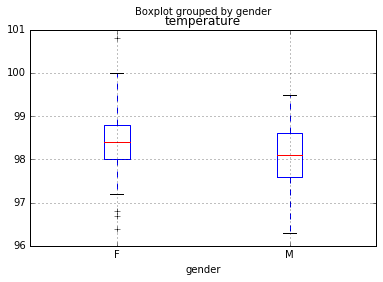

In [29]:
df.boxplot(column="temperature", by ='gender');

In [30]:
# H0 : There is NO difference between female/male temperatures
# H1 : There IS a difference between female/male temperatures
# p_value threshold : 5%

In [31]:
# split df by gender into female and male subsets
df1 = df[df['gender'] == 'F']
df2 = df[df['gender'] == 'M']

In [32]:
#get stats for female
n1 = len(df1.temperature) 
temp_mean1 = np.mean(df1.temperature)
temp_var1 = np.var(df1.temperature)
temp_sd1 = np.std(df1.temperature)
temp_se1 = temp_sd / np.sqrt(n) 
print ('female stats: ',n1,temp_mean1,temp_var1,temp_sd1,temp_se1)
#get stats for male
n2 = len(df2.temperature) 
temp_mean2 = np.mean(df2.temperature)
temp_var2 = np.var(df2.temperature)
temp_sd2 = np.std(df2.temperature)
temp_se2 = temp_sd / np.sqrt(n) 
print ('  male stats: ',n2,temp_mean2,temp_var2,temp_sd2,temp_se2)

female stats:  65 98.39384615384613 0.5442698224852062 0.7377464486428966 0.0640566146952
  male stats:  65 98.1046153846154 0.4807479289940825 0.6933598841828696 0.0640566146952


In [34]:
#create a function to return z_value and p_value
def twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2):
    from numpy import sqrt, abs, round
    from scipy.stats import norm
    pooledSE = sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = 2*(1 - norm.cdf(abs(z)))
    return round(z, 3), round(pval, 4)

In [35]:
z_value, p_value = twoSampZ(temp_mean1, temp_mean2, 0, temp_sd1, temp_sd2, n1, n2)
print (z_value, p_value)
if p_value < alpha:
    print ('P-value is ', p_value)
    print ('Reject H0: There IS a difference between female/male mean temperatures')
else:
    print ('P-value is ', p_value)
    print ('Accept H0: There is NO difference between female/male mean temperatures')

2.303 0.0213
P-value is  0.0213
Reject H0: There IS a difference between female/male mean temperatures
